# Experience 1.1 World Cantril Ladder Scores over time

In [1]:
import pandas as pd
import math as math
import seaborn as sns
import matplotlib as plt

In [2]:
cantril_ladder = pd.read_csv("happiness-cantril-ladder.csv")

In [3]:
cantril_ladder.head(2)

,Entity,Code,Year,World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best))
0,Afghanistan,AFG,2008,3.723590
1,Afghanistan,AFG,2009,4.401778


In [4]:
cantril_ladder['Cantril_Score'] = cantril_ladder['World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best))']


In [7]:
cantril_ladder.drop("World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best))",
                   inplace=True, axis=1)

In [8]:
cantril_ladder.head(2)

,Entity,Code,Year,Cantril_Score
0,Afghanistan,AFG,2008,3.723590
1,Afghanistan,AFG,2009,4.401778


In [9]:
cantril_ladder.groupby("Year").count()

,Entity,Code,Cantril_Score
Year,,,
2005,27,27,27
2006,89,89,89
2007,102,102,102
2008,110,110,110
2009,114,114,114
2010,124,124,124
2011,146,146,146
2012,142,142,142
2013,137,137,137


In [14]:
selected_countries = cantril_ladder[cantril_ladder['Year'] == 2007]['Entity'].tolist()
print(selected_countries)

['Albania', 'Argentina', 'Armenia', 'Australia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guyana', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kyrgyzstan', 'Laos', 'Latvia', 'Liberia', 'Lithuania', 'Macedonia', 'Malawi', 'Malaysia', 'Mauritania', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Palestine', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Saudi Arabia', 'Senegal', 'Serbia', 'Sierra Leone', 'Si

In [16]:
cantril_ladder[cantril_ladder['Entity'].isin(selected_countries)].groupby('Year').count()

,Entity,Code,Cantril_Score
Year,,,
2005,24,24,24
2006,62,62,62
2007,102,102,102
2008,84,84,84
2009,85,85,85
2010,92,92,92
2011,97,97,97
2012,94,94,94
2013,95,95,95


In [17]:
cantril_ladder_selected_years = cantril_ladder[cantril_ladder['Year'] > 2006]

In [19]:
cantril_ladder_selected_years_and_countries = cantril_ladder_selected_years[cantril_ladder_selected_years['Entity'].isin(selected_countries)]



In [32]:
placeholder = cantril_ladder_selected_years_and_countries.groupby(['Entity']).count().reset_index()
countries_that_appear_all_years = placeholder[placeholder['Code'] == 12]['Entity'].tolist()


In [37]:
cantril_ladder_consistent_countries = cantril_ladder_selected_years_and_countries[cantril_ladder_selected_years_and_countries['Entity'].isin(countries_that_appear_all_years)]
cantril_ladder_consistent_countries


,Entity,Code,Year,Cantril_Score
34,Argentina,ARG,2007,6.073158
35,Argentina,ARG,2008,5.961034
36,Argentina,ARG,2009,6.424133
37,Argentina,ARG,2010,6.441067
38,Argentina,ARG,2011,6.775805
...,...,...,...,...
1699,Zimbabwe,ZWE,2014,4.184451
1700,Zimbabwe,ZWE,2015,3.703191
1701,Zimbabwe,ZWE,2016,3.735400
1702,Zimbabwe,ZWE,2017,3.638300


In [39]:
cantril_ladder_consistent_countries

,Entity,Code,Year,Cantril_Score
34,Argentina,ARG,2007,6.073158
35,Argentina,ARG,2008,5.961034
36,Argentina,ARG,2009,6.424133
37,Argentina,ARG,2010,6.441067
38,Argentina,ARG,2011,6.775805
...,...,...,...,...
1699,Zimbabwe,ZWE,2014,4.184451
1700,Zimbabwe,ZWE,2015,3.703191
1701,Zimbabwe,ZWE,2016,3.735400
1702,Zimbabwe,ZWE,2017,3.638300


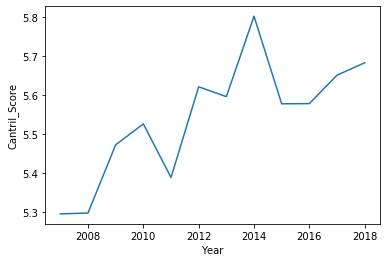

In [44]:
sns.lineplot(x='Year',
            y='Cantril_Score',
            data=cantril_ladder_consistent_countries.groupby('Year').median().reset_index())

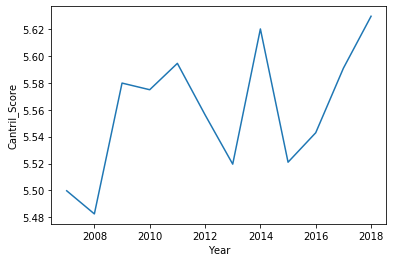

In [45]:
sns.lineplot(x='Year',
            y='Cantril_Score',
            data=cantril_ladder_consistent_countries.groupby('Year').mean().reset_index())

In [ ]:
sns.lineplot(x='Year',
            y='Cantril_Score',
            data=cantril_ladder_consistent_countries.groupby('Year').median().reset_index())

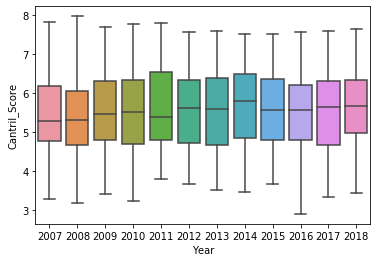

In [47]:
sns.boxplot(x='Year',
           y='Cantril_Score',
           data=cantril_ladder_consistent_countries)

In [46]:
cantril_ladder_consistent_countries

,Entity,Code,Year,Cantril_Score
34,Argentina,ARG,2007,6.073158
35,Argentina,ARG,2008,5.961034
36,Argentina,ARG,2009,6.424133
37,Argentina,ARG,2010,6.441067
38,Argentina,ARG,2011,6.775805
...,...,...,...,...
1699,Zimbabwe,ZWE,2014,4.184451
1700,Zimbabwe,ZWE,2015,3.703191
1701,Zimbabwe,ZWE,2016,3.735400
1702,Zimbabwe,ZWE,2017,3.638300
